## Main Goal
The objective of this project is to predict the food delivery time based on the distance covered by the delivery partner to deliver the order!  

### Data Understanding
The dataset has the following features:

1. **ID**: order ID number 
2. **Delivery_person_ID**: ID number of the delivery partner
3. **Delivery_person_Age**: Age of the delivery partner
4. **Delivery_person_Ratings**: ratings of the delivery partner based on past deliveries
5. **Restaurant_latitude**: The latitude of the restaurant
6. **Restaurant_longitude**: The longitude of the restaurant
7. **Delivery_location_latitude**: The latitude of the delivery location
8. **Delivery_location_longitude**: The longitude of the delivery location
9. **Type_of_order**: The type of meal ordered by the customer
10. **Type_of_vehicle**: The type of vehicle delivery partner rides
11. **Time_taken(min)**: The time taken by the delivery partner to complete the order

The dataset can be accessed from: [https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset/data]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dataset = pd.read_csv("datasets/deliverytime.txt")

In [4]:
dataset.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [5]:
dataset.shape

(45593, 11)

In [6]:
dataset.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

### Exploratory Data Analysis
#### What is the distribution of the target variable (Time_taken(min)), and are there any outliers or skewness in the data?

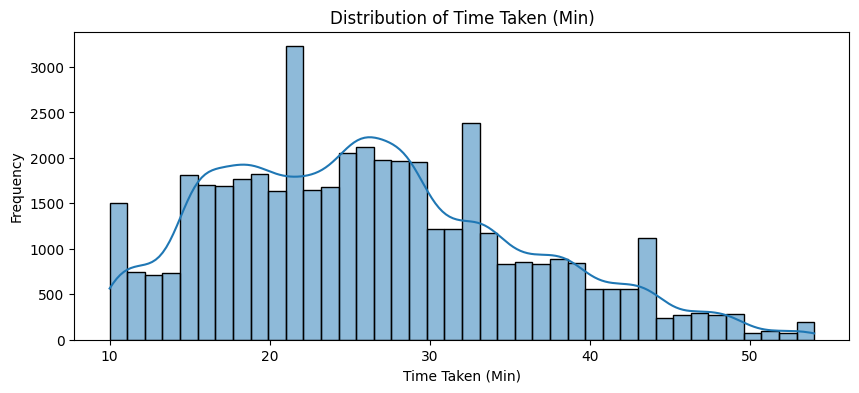

In [7]:
# Plot histogram for the target variable
plt.figure(figsize=(10, 4))
sns.histplot(data=dataset['Time_taken(min)'], kde=True, bins=40)
plt.title("Distribution of Time Taken (Min)")
plt.xlabel("Time Taken (Min)")
plt.ylabel("Frequency")
plt.show()

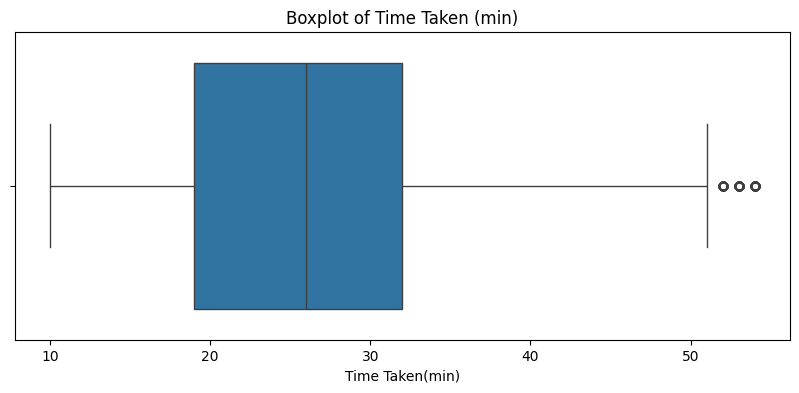

In [8]:
# Boxplot for the target variable
plt.figure(figsize=(10, 4))
sns.boxplot(x=dataset['Time_taken(min)'])
plt.title('Boxplot of Time Taken (min)')
plt.xlabel("Time Taken(min)")
plt.show()

> The histogram shows the data is right skewed and the boxplot shows there are few outliers!  

##### Applying logarithmic transformaton

In [9]:
# Apply logarithmic transformation to the target variable 'Time_taken(min)'
dataset['Log_Time_taken(min)'] = np.log(dataset['Time_taken(min)'] + 1) # Adding 1 to avoid log(0)

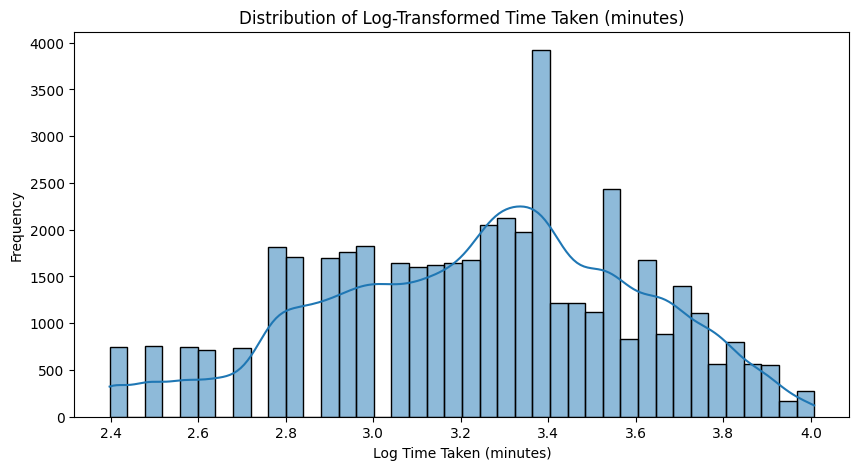

In [10]:
# Plot histogram for the transformed variable 'Log_Time_taken(min)'
plt.figure(figsize=(10, 5))
sns.histplot(dataset['Log_Time_taken(min)'], kde=True, bins=40)
plt.title('Distribution of Log-Transformed Time Taken (minutes)')
plt.xlabel('Log Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

> The histogram's shape, while not perfectly normal, shows less skewness compared to the original distribution. This suggests that the transformation has mitigated the right skewness, leading to a more symmetrical distribution.

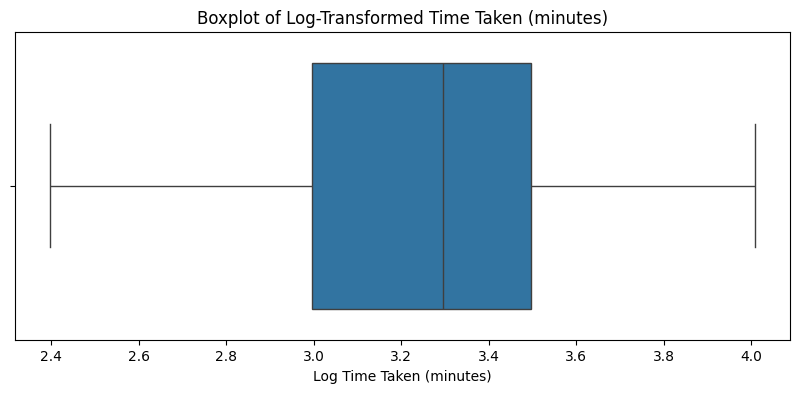

In [11]:
# Plot boxplot for the transformed variable 'Log_Time_taken(min)'
plt.figure(figsize=(10, 4))
sns.boxplot(x=dataset['Log_Time_taken(min)'])
plt.title('Boxplot of Log-Transformed Time Taken (minutes)')
plt.xlabel('Log Time Taken (minutes)')
plt.show()

> The absence of outliers in the boxplot after the transformation indicates that the extreme values in the original data have been effectively normalized!  
The median around 3.3 suggests that, on average, the log-transformed Time_taken(min) is approximately 3.3. In terms of the original scale, this corresponds to $𝑒^{3.3} ≈ 27$ minutes!  
The interquartile range (IQR), spanning from 3.0 to 3.5, represents the middle 50% of the log-transformed data. This indicates that most delivery times are within this range on the log scale!  
When back-translated to the original scale, these values are approximately $𝑒^{3.0} ≈ 20$ minutes to $𝑒^{3.5} ≈ 33$ minutes!  

#### What are the summary statistics (mean, median, standard deviation) for the delivery time, and how do these compare across different segments of the data?

In [12]:
# Summary statistics for 'Time_taken(min)'
summary_stats = dataset['Time_taken(min)'].describe()
print(summary_stats)

count    45593.000000
mean        26.294607
std          9.383806
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: Time_taken(min), dtype: float64


In [13]:
# Mean, median, and standard deviation for 'Time_taken(min)' across different segments (e.g., Type_of_vehicle)
vehicle_stats = dataset.groupby('Type_of_vehicle')['Time_taken(min)'].agg(['mean', 'median', 'std'])
print(vehicle_stats)

                        mean  median       std
Type_of_vehicle                               
bicycle            26.426471    26.0  9.262855
electric_scooter   24.470110    24.0  8.610859
motorcycle         27.605674    26.0  9.647811
scooter            24.480754    24.0  8.704238


> The mean delivery time tells us the average time taken by each type of vehicle to complete a delivery. Based on the means, motorcycles have the highest average delivery time, while electric scooters and regular scooters have the lowest average delivery times.  

> The median is the middle value in the delivery time data. Half of the deliveries took less time than the median, and half took more. Here, both bicycles and motorcycles have a median delivery time of 26.0 minutes, while electric scooters and scooters have a median of 24.0 minutes.

> The standard deviation measures the variability or dispersion of the delivery times. A higher standard deviation indicates more variation in delivery times. Motorcycles have the highest standard deviation, suggesting that their delivery times are more spread out compared to other vehicles. Electric scooters have the lowest standard deviation, indicating more consistent delivery times.  

#### How does the calculated distance between the restaurant and the delivery location (using their latitudes and longitudes) correlate with the delivery time?

In [14]:
# Calculating the distance between two points
# Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Converting latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine Formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    r = 6371 # radius of earch in km
    return r * c


In [15]:
lat1 = dataset['Restaurant_latitude'].get(0)
lon1 = dataset['Restaurant_longitude'].get(0)
lat2 = dataset['Delivery_location_latitude'].get(0)
lon2 = dataset['Delivery_location_longitude'].get(0)
print(lat1, lon1, lat2, lon2)

22.745049 75.892471 22.765049 75.912471


In [16]:
distance = haversine(lat1, lon1, lat2, lon2)
print(distance)

3.0251492856775037


In [17]:
# Calculate the distance for each order and creating a new feature 'Distance'
dataset['Distance'] = dataset.apply(lambda row:haversine(
    row['Restaurant_latitude'], row['Restaurant_longitude'],
    row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [18]:
dist_corr = dataset['Distance'].corr(dataset['Time_taken(min)'])
print(f"Correlation between distance and delivery time: {dist_corr}")

Correlation between distance and delivery time: -0.0025080671415679623


> A correlation near 0 suggests little to no linear relationship between the two variables.  
In this case, distance and delivery time are almost independent, meaning changes in one variable (distance) do not consistently lead to changes in the other variable (delivery time).  
Distance may not be a primary factor influencing delivery time in the dataset.

#### Is there a relationship between the Delivery_person_Age and the delivery time?

In [19]:
age_time_corr = dataset['Delivery_person_Age'].corr(dataset['Time_taken(min)'])
print(f"Correlation between Delivery_person_Age and Time_taken(min): {age_time_corr}")


Correlation between Delivery_person_Age and Time_taken(min): 0.29270785912923786


In [20]:
# Group 'Delivery_person_Age' into categories
bins = [0, 19, 29, 39, 49, 59]  # Define age ranges
labels = ['Teenagers', 'Young Adults', 'Middle-Aged', 'Older Adults', 'Seniors']
dataset['Age_Group'] = pd.cut(dataset['Delivery_person_Age'], bins=bins, labels=labels, right=False)

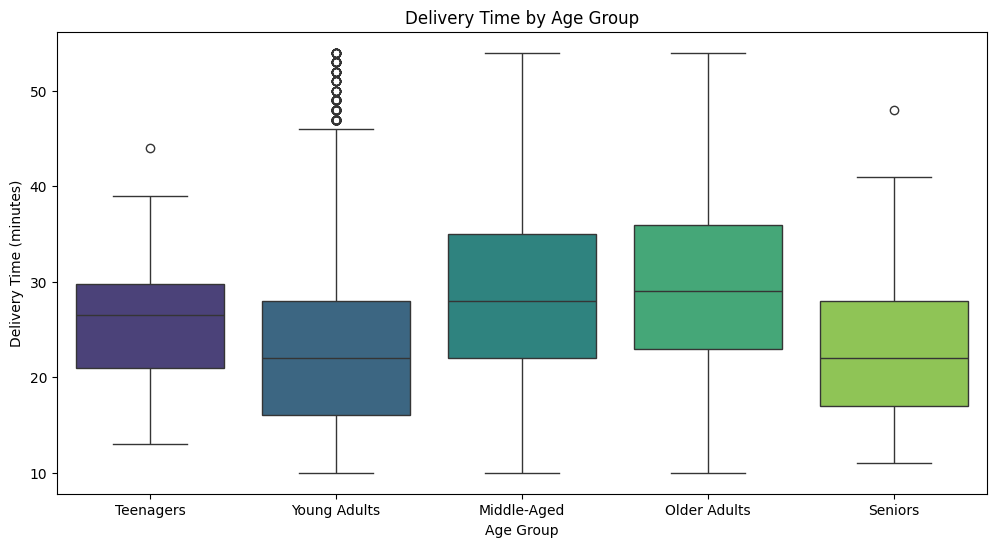

In [21]:
# Plot boxplot for 'Time_taken(min)' across age groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Group', y='Time_taken(min)', data=dataset, hue=dataset['Age_Group'], palette='viridis')
plt.title('Delivery Time by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Delivery Time (minutes)')
plt.show()

> **Teenagers & Middle-Aged/Older Adults**: Median (Q2) delivery times are higher (around 27-30 minutes), indicating slower deliveries compared to others. Their IQRs also suggest a wider range of delivery times.  
**Young Adults & Seniors**: Have lower medians (23 minutes) and narrower IQRs, implying faster and more consistent deliveries compared to other groups. This shows that younger and senior groups tend to be quicker and more consistent, while middle-aged and older individuals have more variability and longer delivery times.

#### How does the Delivery_person_Ratings influence the delivery time—do higher ratings correspond to faster deliveries?

In [22]:
rating_time_corr = dataset['Delivery_person_Ratings'].corr(dataset['Time_taken(min)'])
print(f"Correlation: {rating_time_corr}")

Correlation: -0.3311027208682083


In [23]:
# Grouping 'Delivery_person_Ratings' into different categories
bins = [1, 2, 3, 4, 5, 6]
labels = ['1-2', '2-3', '3-4', '4-5', '5-6']
dataset['Rating_Group'] = pd.cut(dataset['Delivery_person_Ratings'], bins=bins, labels=labels, right=False)

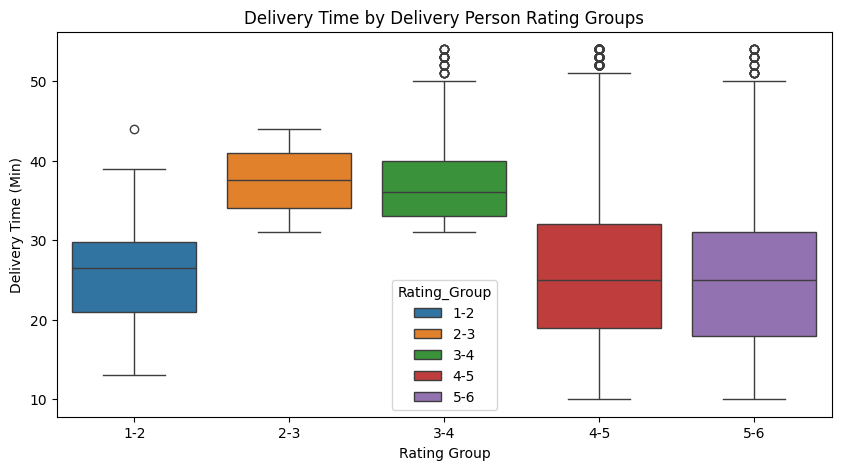

In [24]:
# Visualizing Time_taken across different groups
plt.figure(figsize=(10, 5))
sns.boxplot(x='Rating_Group', y='Time_taken(min)', data=dataset, hue=dataset['Rating_Group'])
plt.title('Delivery Time by Delivery Person Rating Groups')
plt.xlabel('Rating Group')
plt.ylabel('Delivery Time (Min)')
plt.show()

> **1-2, 4-5, 5-6**: Lower and narrower IQRs (e.g., Q2 ~ 25-27) suggest faster and more consistent deliveries.  
**2-3, 3-4**: Higher and wider IQRs (e.g., Q2 ~ 37-38) indicate slower and more variable delivery times.  
This implies higher-rated delivery persons (4-6) tend to deliver faster and with more consistency.  

#### Do different types of orders (Type_of_order) exhibit significant differences in delivery times?

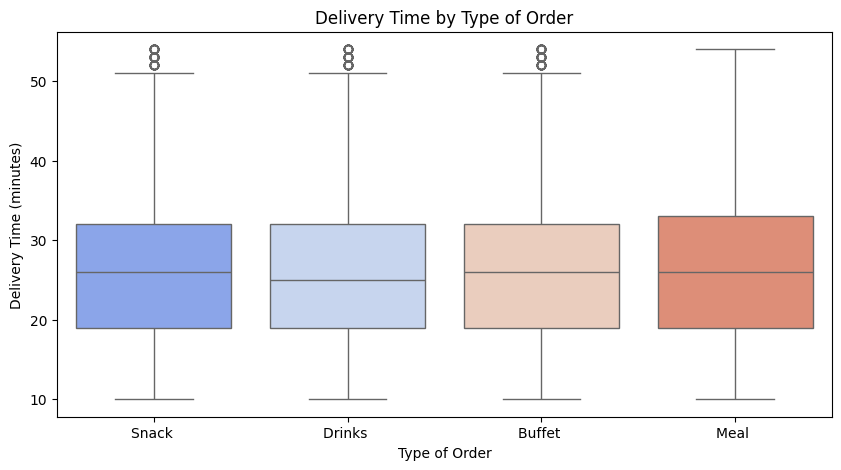

In [25]:
# Plot boxplot for 'Time_taken(min)' across different 'Type_of_order'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Type_of_order', y='Time_taken(min)', data=dataset, hue=dataset['Type_of_order'], palette='coolwarm')
plt.title('Delivery Time by Type of Order')
plt.xlabel('Type of Order')
plt.ylabel('Delivery Time (minutes)')
plt.show()

> The interquartiles (Q1 to Q3) of all boxplots are very close, it means that the delivery times for different Type_of_order categories are similar and exhibit little variability. This suggests that the type of order likely does not have a significant impact on delivery times. Other factors might be influencing delivery times more prominently.

##### Conducting ANOVA test  
**ANOVA** (Analysis of Variance) is a statistical test that compares the means of three or more groups to determine if they are significantly different.

**Why use it here?** Since Type_of_order has 4 groups, ANOVA can check if the mean delivery times differ significantly between these groups.

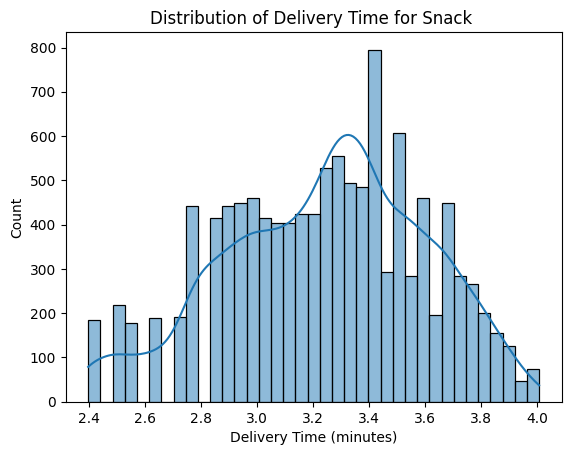

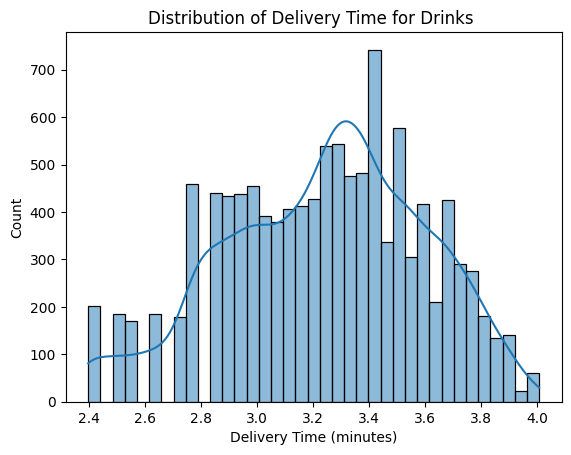

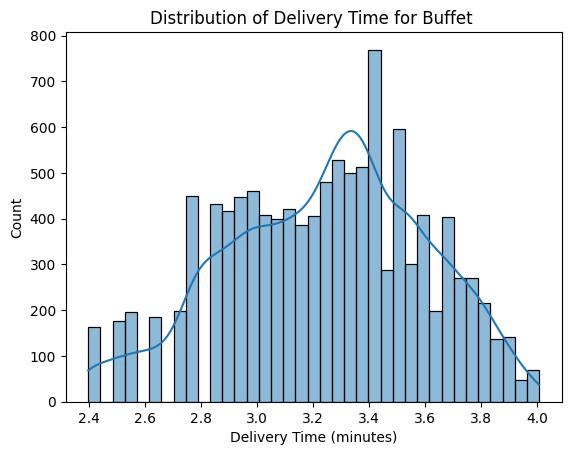

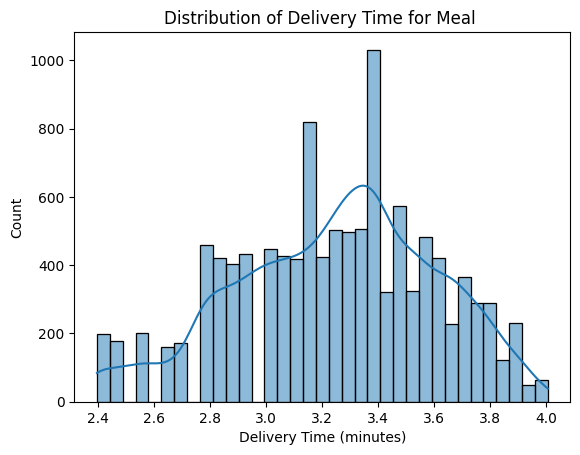

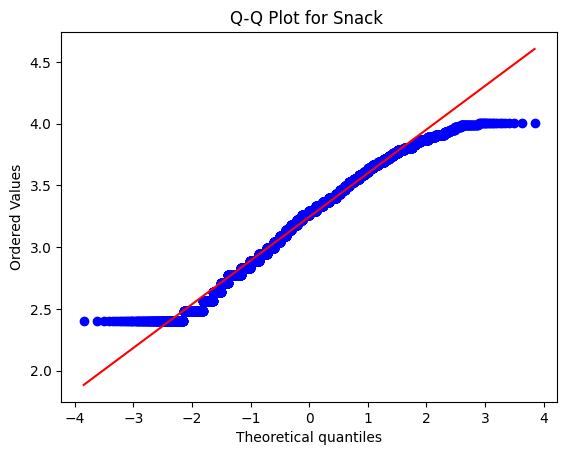

In [26]:
# Checking the first assumption (Normality)

import scipy.stats as stats

# Visualize normality with histograms
order_types = dataset['Type_of_order'].unique()
for order_type in order_types:
    sns.histplot(dataset[dataset['Type_of_order'] == order_type]['Log_Time_taken(min)'], kde=True)
    plt.title(f'Distribution of Delivery Time for {order_type}')
    plt.xlabel('Delivery Time (minutes)')
    plt.show()

# Q-Q plot for one of the order types as an example
stats.probplot(dataset[dataset['Type_of_order'] == order_types[0]]['Log_Time_taken(min)'], dist="norm", plot=plt)
plt.title(f"Q-Q Plot for {order_types[0]}")
plt.show()


> Normality assumption is satisfied!

In [27]:
# Check Homogeneity of Variances
from scipy.stats import levene

stat, p_value = levene(
    dataset[dataset['Type_of_order'] == order_types[0]]['Log_Time_taken(min)'],
    dataset[dataset['Type_of_order'] == order_types[1]]['Log_Time_taken(min)'],
    dataset[dataset['Type_of_order'] == order_types[2]]['Log_Time_taken(min)'],
    dataset[dataset['Type_of_order'] == order_types[3]]['Log_Time_taken(min)']
)
print(f"Levene’s Test: Stat={stat}, p-value={p_value}")


Levene’s Test: Stat=0.13463946683471, p-value=0.9394313137183586


> p-value > 0.05: Variances are similar (assumption satisfied).

In [28]:
from scipy.stats import f_oneway

# Perform ANOVA
anova_result = f_oneway(
    dataset[dataset['Type_of_order'] == order_types[0]]['Log_Time_taken(min)'],
    dataset[dataset['Type_of_order'] == order_types[1]]['Log_Time_taken(min)'],
    dataset[dataset['Type_of_order'] == order_types[2]]['Log_Time_taken(min)'],
    dataset[dataset['Type_of_order'] == order_types[3]]['Log_Time_taken(min)']
)

print(f"ANOVA Test: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

ANOVA Test: F-statistic = 0.9611316242583394, p-value = 0.40996452275236805


> F-statistic: Measures the ratio of variance between groups to variance within groups. A higher F-statistic suggests more variation between groups relative to within-group variation.  
**F-statistic (0.96)**: This value suggests that the variance between the means of the four Type_of_order groups is relatively small compared to the variance within the groups.

> If p-value > 0.05: There is no evidence of significant differences in mean delivery times between groups.  
**p-value (0.41)**: Since the p-value is significantly greater than the significance threshold of 0.05, we fail to reject the null hypothesis.  
(This means that there is no statistically significant difference in the mean delivery times across the four different Type_of_order groups. In other words, the type of order does not appear to have a meaningful impact on delivery time in your dataset.)

#### How does the Type_of_vehicle used by the delivery partner affect the delivery time?

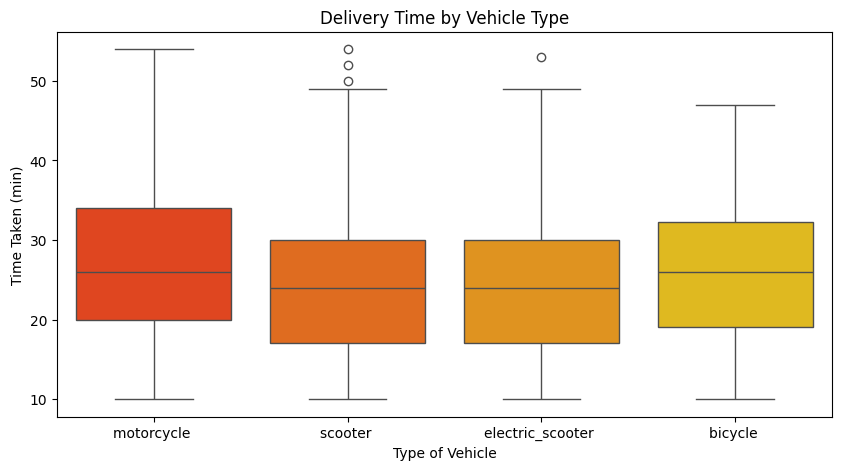

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Type_of_vehicle', y='Time_taken(min)', data=dataset, hue=dataset['Type_of_vehicle'], palette='autumn')
plt.title('Delivery Time by Vehicle Type')
plt.xlabel('Type of Vehicle')
plt.ylabel('Time Taken (min)')
plt.show()

> Motorcycles and bicycles have slightly longer delivery times overall compared to scooters and electric scooters. Scooters and electric scooters share similar time distributions, suggesting they may be more efficient for quicker deliveries.